# *Cook County Electric Vehicle Charging Station Optimization*

In [1]:
using CSV
using DataFrames
using JuMP

In [2]:
pwd()

"/Users/linhle/Downloads"

In [3]:
# reading the file
csv_reader = CSV.File("demo_ev.csv")
println(typeof(csv_reader))

CSV.File


In [4]:
T = CSV.File("demo_ev.csv", header=0) |> DataFrame
T = Matrix(T)

Cost_raw = CSV.File("cost.csv", header=0) |> DataFrame
Cost_raw = Matrix(Cost_raw)

59×2 Matrix{Int64}:
 60666   6781
 60656   6781
 60631   6781
 60646  10026
 60630   6781
 60659   6781
 60625   6781
 60645   6781
 60626   6781
 60660   6781
 60640   6781
 60634   6781
 60641   6781
     ⋮  
 60827   6781
 60637   6781
 60652   6781
 60620   6781
 60619   6781
 60649   6781
 60655   6781
 60643   6781
 60628   6781
 60617   6781
 60633   6781
 60642  11921

In [5]:
b = T[:,2]
cost = Cost_raw[:,2]

59-element Vector{Int64}:
  6781
  6781
  6781
 10026
  6781
  6781
  6781
  6781
  6781
  6781
  6781
  6781
  6781
     ⋮
  6781
  6781
  6781
  6781
  6781
  6781
  6781
  6781
  6781
  6781
  6781
 11921

In [6]:
# New D
# Distance between zip codes in a top-pown manner from northmost till southern Chicago  
#60666,60656,60631,60646,60630,60659,60625,60645,60626,60660,60640,60634,60641,60618,60613,60657,60614,60647,60639,60707,60651,60622,60610,60611,60644,60624,60612,60607,60661,60606,60654,60601,60602,60603,60604,60605,60623,60608,60616,60632,60609,60653,60615,60638,60629,60636,60621,60827,60637,60652,60620,60619,60649,60655,60643,60628,60617,60637,60633,60642
D = [0       6.5   7.0   9.3   9.5   13.2  12.5  17.7  19.4  15.3  15.0  9.3   10.7  11.9  14.6  16.5  16.9  13.8  12.5  9.5   15.5  15.7  18.1  18.4  21.5  22.4  20.9  18.8  17.5  17.9  17.5  18.8  18.2  18.6  18.6  19.5  23.9  22.8  22.4  24.9  24.0  23.6  24.9  30.0  28.3  27.6  26.2  37.6  26.3  31.2  29.4  28.2  28.6  34.5  33.8  31.6  30.8  36.6  16.1;
 6.1   0     1.6   3.7   3.3   6.4   5.6   8.0   9.7   8.4   8.7   2.7   4.0   5.6   8.3   10.2  10.6  7.6   6.0   4.0   9.3   9.4   11.8  12.2  18.1  15.9  14.7  12.6  11.3  11.6  11.3  12.6  12.0  12.3  12.3  13.3  17.6  16.5  16.2  18.7  17.8  17.4  18.7  22.0  22.1  21.4  19.9  31.3  20.1  25.4  23.1  22.0  22.3  29.0  27.6  25.4  24.6  30.3  9.9;
 6.4   1.7   0     3.2   4.8   6.2   7.8   7.5   9.2   8.2   10.3  4.1   6.0   7.2   9.9   11.8  12.2  9.1   7.8   5.4   10.9  11.0  13.4  13.7  19.6  17.5  16.2  14.1  12.8  13.2  12.8  14.1  13.5  13.9  13.9  14.8  19.1  18.1  17.7  20.2  19.3  19.0  20.2  23.5  23.6  22.9  21.5  32.9  21.6  26.9  24.7  23.5  23.9  30.5  29.1  26.9  26.1  31.9  11.5;
 9.4   3.7   3.2   0     2.1   3.3   4.4   4.8   6.5   5.3   6.3   4.8   3.7   5.0   7.7   9.6   10.0  6.9   6.1   7.5   7.0   8.8   11.2  11.5  17.5  15.3  14.0  11.9  10.6  11.0  10.6  11.9  11.3  11.7  11.7  12.6  17.0  15.9  15.5  18.1  17.1  16.8  18.1  21.4  21.5  20.7  19.3  30.7  19.5  24.7  22.5  21.3  21.7  28.3  26.9  24.8  23.9  29.7  9.3 ;
 9.0   3.3   4.5   2.3   0     3.9   3.1   6.1   7.8   6.0   4.8   3.6   2.0   3.5   6.2   8.1   8.5   5.4   4.4   6.3   5.3   7.3   9.6   10.0  15.9  13.8  12.5  10.4  9.1   9.4   9.1   10.4  9.8   10.1  10.2  11.1  15.4  14.3  14.0  16.5  15.6  15.2  16.5  19.8  19.9  19.2  17.7  29.2  17.9  23.2  20.9  19.8  20.1  26.8  25.4  23.2  22.4  28.1  7.7;
 12.6  6.6   6.1   3.2   3.8   0     1.6   1.9   3.5   2.2   3.5   7.7   5.9   3.6   5.7   6.5   8.1   9.1   8.3   10.5  9.2   11.0  9.4   10.0  19.7  17.5  16.2  14.1  12.8  13.2  12.8  10.8  13.5  11.1  11.4  12.0  19.2  18.1  13.9  20.3  19.3  15.1  17.2  23.6  23.7  22.9  21.5  32.9  21.7  27.0  24.7  23.5  20.0  30.6  29.1  27.0  26.1  31.9  11.5;
 11.4  5.7   7.0   5.0   3.1   1.8   0     3.3   4.8   3.5   2.1   6.1   4.2   2.2   3.7   4.6   7.0   4.0   6.6   8.8   7.3   5.7   9.1   9.0   15.0  12.8  11.6  9.5   8.1   8.5   8.6   9.8   8.9   9.2   10.4  10.9  14.5  13.4  13.1  15.6  14.7  14.3  15.6  18.9  19.0  18.3  16.8  28.2  17.0  22.3  20.0  18.9  19.2  25.9  24.4  22.3  21.5  27.2  6.8;
 13.7  8.0   7.5   4.9   6.4   1.8   3.2   0     2.1   3.0   4.3   9.9   8.0   5.7   6.4   7.2   8.8   11.2  10.4  12.6  11.3  13.1  10.1  10.7  21.7  19.6  18.3  16.2  14.9  15.3  14.9  11.5  12.0  11.9  12.1  12.7  21.2  20.1  14.6  22.3  21.4  15.9  17.9  25.6  25.7  25.0  23.6  35.0  23.7  29.0  26.8  25.6  20.8  32.6  32.2  29.0  28.2  34.0  13.6;
 15.4  9.7   9.2   6.5   8.0   3.4   4.7   2.1   0     1.6   3.1   11.5  9.7   6.8   5.1   5.8   7.5   12.9  12.1  14.3  12.9  12.3  8.8   9.4   18.7  16.5  15.3  13.2  11.3  10.9  9.3   10.2  10.7  10.5  10.8  11.3  20.1  16.8  13.3  18.9  17.1  14.5  16.6  22.2  22.3  20.7  19.2  30.6  18.6  24.7  22.4  21.2  19.4  28.3  26.8  24.7  23.8  29.6  9.8 ;
 14.7  8.6   8.1   5.2   5.9   2.1   3.4   2.9   1.9   0     1.8   9.8   8.0   5.4   3.9   4.7   6.3   7.0   10.4  12.6  10.3  11.1  7.6   8.2   17.5  15.4  14.1  12.0  10.1  9.8   8.2   9.1   9.5   9.4   9.6   10.2  19.0  15.6  12.1  17.8  15.9  13.4  15.4  21.1  21.2  19.5  18.0  29.5  17.5  23.5  21.3  20.1  18.3  27.1  25.7  23.5  22.7  28.4  8.6;
 13.1  7.4   8.6   6.3   4.8   3.6   2.3   4.2   3.1   1.8   0     7.7   5.8   3.8   1.1   2.3   4.9   5.3   8.2   10.4  8.7   6.2   6.2   6.9   16.1  14.0  12.7  10.6  8.8   8.4   6.8   7.7   8.1   8.0   8.2   8.8   17.6  14.2  10.7  16.4  14.5  12.0  14.0  19.7  19.8  18.1  16.7  28.1  16.1  22.1  19.9  18.7  16.9  25.7  24.3  22.1  21.3  27.1  7.2;
 8.8   2.7   4.0   4.8   3.6   7.5   6.8   9.4   11.0  9.5   7.7   0     2.3   4.2   7.3   9.2   9.6   6.5   3.5   3.0   4.9   8.4   10.8  11.2  6.2   7.7   13.6  11.5  10.2  10.6  10.3  11.6  10.9  11.3  11.3  12.3  10.8  15.5  15.1  17.7  16.7  16.4  17.7  21.0  21.1  20.3  18.9  30.3  19.1  24.4  22.1  20.9  21.3  28.0  26.5  24.4  23.5  29.3  8.9;
 11.1  5.4   6.7   4.1   2.0   5.7   4.9   7.6   9.3   7.8   5.8   2.3   0     2.1   5.4   5.4   7.7   4.6   2.4   4.9   3.3   6.5   8.9   9.2   4.8   5.3   11.7  9.6   8.3   8.7   8.3   9.6   9.0   9.4   9.4   10.3  14.7  13.6  13.2  15.8  14.8  14.5  15.8  19.1  19.2  18.4  17.0  28.4  17.2  22.4  20.2  19.0  19.4  26.0  24.6  22.5  21.6  27.4  7.0;
 11.3  5.6   6.9   5.3   3.6   3.6   2.3   8.8   8.1   6.8   3.9   4.2   2.1   0     3.5   3.3   5.3   1.9   4.4   6.9   5.2   4.1   6.6   6.9   12.8  10.6  9.4   7.3   5.9   6.3   6.0   7.2   6.7   7.0   7.0   8.0   12.3  11.2  10.9  13.4  12.5  12.1  13.4  16.7  16.8  16.1  14.6  26.0  14.8  20.1  17.8  16.7  17.0  23.7  22.2  20.1  19.3  25.0  4.6;
 14.1  8.4   9.6   8.0   5.8   5.2   3.7   6.0   4.7   3.3   1.1   7.3   5.5   3.4   0     1.3   3.9   4.9   7.8   10.3  8.3   5.8   5.2   5.8   15.1  13.0  11.7  9.6   7.7   7.4   5.8   6.7   7.1   7.0   7.2   7.8   16.6  13.2  9.7   15.4  13.5  11.0  13.0  18.7  18.8  17.1  15.6  27.1  15.1  21.1  18.9  17.7  15.9  24.7  23.3  21.1  20.3  26.0  6.2;
 14.9  9.2   10.5  8.8   7.2   6.7   4.1   7.4   6.1   4.8   2.7   10.4  5.7   3.1   1.4   0     1.6   3.8   6.7   9.2   7.2   4.7   4.2   4.8   12.8  10.7  9.4   7.3   6.0   6.3   4.7   5.6   6.1   5.9   6.2   6.7   15.5  12.2  8.7   14.3  12.5  9.9   12.0  17.6  17.7  16.1  14.6  26.0  14.0  20.1  17.8  16.6  14.8  23.7  22.2  20.1  19.2  25.0  3.3;
 16.3  10.5  11.9  10.2  8.6   8.1   7.4   8.8   7.5   6.2   5.1   11.7  7.1   5.3   4.0   1.9   0     4.4   7.3   15.3  6.2   3.8   1.8   3.1   10.8  8.7   4.9   5.3   4.0   3.2   2.3   3.9   3.1   4.2   4.5   5.0   10.4  9.3   7.0   11.5  10.5  8.2   10.3  14.8  14.9  14.1  12.7  24.1  12.3  18.1  15.9  14.7  13.1  21.7  20.3  18.2  17.3  23.1  2.1;
 13.7  8.0   9.3   7.7   6.0   9.3   4.3   11.2  12.9  9.6   5.8   5.5   3.4   2.1   5.4   4.5   5.9   0     3.3   5.9   3.3   2.9   7.2   7.5   5.2   3.8   3.7   7.8   6.5   6.9   6.6   7.8   7.2   7.6   7.6   8.5   6.1   11.8  11.4  14.0  13.0  12.7  13.9  17.3  17.4  16.6  15.2  26.6  15.3  20.6  18.4  17.2  17.6  24.2  22.8  20.7  19.8  25.6  5.2;
 13.1  6.6   8.7   6.0   3.9   7.7   6.9   9.6   11.3  9.7   7.8   3.8   2.0   4.0   7.4   6.4   6.8   2.9   0     3.5   1.9   4.4   8.1   8.5   3.2   3.9   4.9   8.8   7.5   7.9   7.6   8.7   8.2   10.3  8.6   10.5  6.6   9.4   12.4  10.1  14.0  13.6  14.9  10.4  12.2  17.6  16.1  27.6  16.3  14.3  19.3  18.2  18.5  25.2  23.8  21.6  20.8  26.5  6.1;
 8.5   4.0   5.3   7.5   6.5   10.2  9.5   12.2  13.9  22.7  10.7  3.0   4.9   12.7  10.3  9.4   16.5  5.9   3.2   0     5.0   7.1   14.7  14.8  5.7   8.8   9.9   12.7  12.5  13.1  14.2  14.6  13.3  13.3  13.3  13.5  10.2  12.4  16.4  18.9  18.0  17.6  18.9  11.8  15.1  21.6  20.1  31.6  20.3  25.6  23.3  22.2  22.5  29.2  27.8  25.6  24.8  30.5  14.7;
 15.5  7.9   11.0  9.4   5.3   11.0  7.2   13.0  19.0  17.7  8.7   5.2   3.3   5.2   8.3   7.3   6.2   3.4   1.9   5.0   0     3.2   6.2   9.9   1.9   2.5   3.6   7.8   7.5   8.1   6.1   9.6   8.3   8.3   8.4   8.5   4.7   7.4   11.4  8.2   13.0  12.7  14.0  8.9   10.8  16.6  15.2  26.6  15.4  12.8  18.4  17.2  17.6  24.3  22.8  20.7  19.8  25.6  4.7;     
 16.4  10.7  11.9  10.3  8.7   11.9  6.0   13.8  11.1  9.8   5.7   11.8  7.2   5.4   6.0   4.4   3.3   2.8   4.6   7.3   3.3   0     3.0   3.9   6.5   3.5   2.1   4.2   2.9   3.3   3.0   4.1   3.6   4.0   4.0   4.9   6.0   4.2   7.8   10.3  9.4   9.0   10.3  13.6  13.7  13.0  11.5  23.0  11.7  17.0  14.8  13.6  13.9  20.6  19.2  17.0  16.2  21.9  1.7;
 17.5  11.8  13.0  11.4  9.8   9.4   12.2  10.1  8.8   7.5   6.4   12.9  8.3   6.5   5.3   4.3   1.8   5.6   8.5   14.9  6.4   3.6   0     1.5   9.6   7.5   6.2   4.1   2.8   1.4   0.6   1.9   1.5   1.9   1.9   5.2   9.1   8.1   7.7   10.2  9.3   9.0   10.2  13.5  13.6  12.9  11.5  22.9  11.6  16.9  14.7  13.5  13.9  20.5  19.1  16.9  16.1  21.9  1.6;
 18.1  12.4  13.6  12.0  10.4  9.8   9.0   10.5  9.1   7.9   6.7   13.5  8.9   7.1   5.7   4.7   3.0   6.2   9.1   15.0  10.0  4.2   1.5   0     9.7   7.6   6.3   4.2   2.4   2.0   1.2   1.3   1.8   1.6   1.8   2.6   9.3   8.2   4.8   10.4  8.5   6.0   8.1   13.7  13.8  12.1  10.7  22.1  10.1  16.1  13.9  12.7  10.9  19.7  18.3  16.1  15.3  21.1  2.5;
 21.3  18.4  19.7  18.0  16.4  19.7  18.9  21.6  18.7  17.5  16.3  6.3   4.8   13.1  15.3  12.7  11.3  5.2   3.1   5.9   1.9   5.1   9.5   9.6   0     1.7   3.2   7.5   7.3   7.8   8.9   9.3   8.1   8.1   8.1   8.3   3.9   7.1   11.2  7.4   12.8  12.4  13.7  7.4   9.5   16.4  14.9  26.3  15.1  11.6  18.1  17.0  17.3  24.0  22.5  20.4  19.6  25.3  9.5;
 22.7  16.3  17.5  15.9  14.3  17.5  16.7  19.5  16.6  15.3  14.2  7.6   5.3   11.0  13.2  10.6  9.2   3.9   3.9   8.7   2.4   3.5   7.4   7.5   1.7   0     1.6   5.4   5.1   5.7   6.8   7.2   5.9   5.9   6.0   6.1   2.8   5.0   9.0   6.2   10.6  10.3  11.6  8.3   8.4   14.2  12.8  24.2  13.0  18.2  16.0  14.8  15.2  21.8  20.4  18.3  17.4  23.2  7.3;
 20.3  14.6  15.9  14.2  12.6  15.9  15.1  17.8  14.9  13.7  12.5  10.5  11.1  9.3   11.5  9.0   7.5   3.3   5.0   9.9   3.7   1.9   5.7   5.8   3.3   1.8   0     3.7   3.5   4.1   5.1   5.5   4.3   4.3   4.3   4.5   3.6   3.4   7.4   5.8   9.0   8.6   9.9   13.2  9.5   12.6  11.1  22.6  11.3  10.7  14.3  13.2  13.5  20.2  18.8  16.6  15.8  21.5  5.7;
 18.3  12.6  13.9  12.3  10.6  13.9  13.1  15.8  13.3  12.1  10.9  13.8  9.1   7.3   9.9   7.0   5.6   6.4   9.8   12.3  7.3   4.5   3.7   4.2   7.1   4.9   3.6   0     1.5   2.1   3.2   3.9   2.4   2.7   2.7   2.0   4.9   2.6   4.7   7.3   6.3   6.0   7.3   10.6  10.7  9.9   8.5   19.9  8.7   13.9  11.7  10.5  10.9  17.5  16.1  14.0  13.1  18.9  3.7;
 16.9  11.2  12.5  10.8  9.2   12.5  11.7  14.4  11.4  10.2  9.0   12.4  7.7   5.9   8.0   5.6   4.1   5.0   7.9   12.8  5.9   3.1   2.3   2.3   7.6   5.4   2.5   1.5   0     0.8   1.8   2.1   1.1   1.1   1.1   2.2   8.8   5.4   5.1   7.6   6.7   6.3   7.6   10.9  11.0  10.3  8.8   20.3  9.0   14.3  12.0  10.9  11.2  17.9  16.5  14.3  13.5  19.2  2.3;
 17.7  12.0  13.2  11.6  10.0  13.2  12.4  15.2  11.0  9.7   8.6   13.1  8.5   6.7   7.5   6.5   3.2   5.8   10.2  12.7  7.7   3.8   1.7   2.4   7.5   5.3   4.0   1.9   0.7   0     1.2   1.2   0.7   0.7   0.7   1.6   7.0   4.0   4.4   8.3   7.4   5.7   8.3   11.6  11.7  11.0  9.6   21.0  9.7   15.0  12.8  11.6  10.6  18.6  17.2  15.0  14.2  20.0  3.0;
 16.9  11.2  12.4  10.8  9.2   12.4  11.6  14.3  9.4   8.2   7.0   12.3  7.7   5.9   6.0   5.5   2.2   5.0   7.9   14.3  5.8   3.0   0.7   1.3   9.0   6.9   5.6   3.5   2.2   2.6   0     1.7   1.3   1.6   1.7   4.2   8.5   7.5   7.1   9.6   8.7   8.4   9.6   12.9  13.0  12.3  10.9  22.3  11.0  16.3  14.1  12.9  13.3  19.9  18.5  16.3  15.5  21.3  2.2;
 18.7  13.0  14.3  12.6  11.0  10.8  10.1  11.6  10.2  8.9   7.8   14.1  9.5   7.7   6.8   5.7   4.1   6.8   12.3  14.8  9.8   4.8   2.1   1.3   9.5   7.4   6.1   4.0   2.1   1.7   1.7   0     1.0   0.9   1.1   1.6   9.0   8.2   4.7   10.4  8.5   6.0   8.0   13.7  13.8  12.1  10.6  22.1  10.1  16.1  13.8  12.7  10.9  19.7  18.3  16.1  15.3  21.0  4.1;
 17.6  11.9  13.2  11.5  9.9   13.2  12.4  11.8  10.4  9.2   8.0   13.0  8.4   6.6   7.0   5.9   3.3   5.7   8.6   13.3  8.3   3.7   1.4   1.3   8.0   5.9   4.6   2.5   1.0   0.6   1.0   0.8   0     0.7   0.7   1.6   7.5   6.5   4.9   8.6   7.7   6.2   8.2   11.9  12.0  11.3  9.9   21.3  10.0  15.3  13.1  11.9  11.1  18.9  17.5  15.3  14.5  20.3  3.0;
 18.7  13.0  14.3  12.7  11.0  10.9  10.2  11.7  10.3  9.0   7.9   14.2  9.5   7.7   6.9   5.8   4.2   6.8   10.9  13.4  8.4   4.9   1.9   1.3   8.1   6.0   4.7   2.6   1.2   0.8   1.5   0.5   0.7   0     0.4   0.9   7.6   7.2   3.8   9.4   7.5   5.0   7.1   12.7  12.8  11.1  9.7   21.1  9.1   15.1  12.9  11.7  9.9   18.7  17.3  15.1  14.3  20.1  4.1;
 18.4  12.7  13.9  12.3  10.7  13.9  13.1  12.3  10.9  9.6   8.5   13.8  9.2   7.4   7.5   6.4   5.6   6.5   10.5  13.0  8.0   4.5   2.1   1.9   7.7   5.6   4.3   2.2   1.3   0.9   3.2   1.1   0.7   0.7   0     0.9   7.2   4.3   3.5   8.4   7.4   4.7   6.8   11.7  11.8  11.0  9.6   21.0  8.9   15.0  12.8  11.6  9.7   18.6  17.2  15.1  14.2  20.0  3.7;
 18.8  13.1  14.4  12.7  11.1  11.6  10.9  12.3  11.0  9.7   8.6   14.2  9.6   7.8   7.5   6.5   4.9   6.9   10.9  13.4  8.4   4.9   4.2   1.9   8.2   6.0   4.7   2.6   1.9   1.5   3.6   1.2   1.2   1.0   0.9   0     7.7   6.8   3.4   9.0   7.2   4.6   6.7   12.3  12.4  10.7  9.3   20.7  8.7   14.7  12.5  11.3  9.5   18.3  16.9  14.8  13.9  19.7  4.2;
 23.4  17.7  19.0  17.3  15.7  19.0  18.2  20.9  18.0  16.8  15.6  10.9  7.6   12.4  14.6  12.1  10.6  6.4   6.2   10.3  4.7   5.9   8.8   8.9   3.9   2.8   3.6   6.8   6.6   7.2   8.3   8.7   7.4   7.4   7.4   7.6   0     3.3   9.0   3.8   10.6  10.2  12.3  5.8   5.9   8.0   12.8  24.2  12.9  7.9   16.0  14.8  15.1  11.3  20.4  18.2  17.4  23.2  8.8;   
 22.4  16.7  18.0  16.3  14.7  18.0  17.2  19.9  16.8  15.6  14.5  17.8  13.2  11.4  13.4  12.4  9.6   10.5  9.9   12.4  7.4   4.4   7.8   8.2   7.2   5.0   3.4   2.4   3.6   4.2   7.2   5.7   4.5   4.5   4.5   3.8   3.4   0     5.6   4.5   4.4   6.8   8.9   7.8   7.9   6.4   9.4   20.8  9.6   8.8   7.9   11.4  11.7  18.5  17.0  14.9  14.0  19.8  7.8;    
 21.3  15.6  16.8  15.2  13.6  14.0  16.0  14.7  13.3  12.1  10.9  16.7  12.1  10.3  9.9   8.8   7.2   9.4   12.3  15.9  10.9  7.4   6.7   4.6   10.6  8.5   7.2   4.2   4.5   5.1   6.1   4.3   4.3   4.1   4.0   3.0   9.1   5.7   0     7.9   4.2   1.9   3.9   11.2  9.9   7.8   6.4   17.8  6.0   11.4  9.6   8.4   6.8   15.4  14.0  11.8  11.0  16.8  6.6;   
 24.5  18.8  20.1  18.4  16.8  20.1  19.2  22.0  18.9  17.7  16.5  19.9  15.3  13.5  15.5  14.4  11.7  12.6  9.7   19.1  8.2   10.6  9.9   10.2  7.4   6.3   5.8   7.4   7.7   8.4   9.3   9.8   8.5   8.5   8.5   8.6   3.8   4.5   7.7   0     3.2   8.9   5.9   4.0   3.0   4.2   5.8   22.9  11.6  4.9   6.2   13.5  13.8  9.0   19.1  16.9  16.1  21.9  9.9;   
 23.6  17.9  19.2  17.5  15.9  19.2  18.4  21.1  17.0  15.8  14.6  19.0  14.4  12.6  13.6  12.5  10.8  11.7  14.6  18.2  13.2  9.8   9.0   8.3   12.9  10.8  9.5   6.5   6.8   7.5   8.4   8.9   7.6   7.6   7.6   6.7   10.8  4.5   4.2   3.2   0     3.5   3.3   12.9  6.1   4.0   3.2   15.9  4.6   7.3   5.5   6.5   8.2   13.5  12.1  9.9   9.1   14.9  9.0;   
 23.2  17.5  18.7  17.1  15.5  15.2  17.9  15.9  14.5  13.3  12.1  18.6  14.0  12.2  11.1  10.0  8.4   11.3  14.2  17.8  12.8  9.3   8.6   5.8   12.5  10.4  9.1   6.1   6.4   7.0   8.0   5.5   5.5   5.3   5.2   4.2   10.3  6.9   2.0   9.1   3.6   0     1.8   12.4  9.6   7.4   6.0   17.4  3.2   11.0  9.2   8.0   5.9   15.0  13.6  11.5  10.6  16.4  8.5;   
 24.4  18.7  19.9  18.3  16.7  17.2  19.1  17.9  16.5  15.3  14.2  19.8  15.2  13.4  13.1  12.1  10.4  12.5  15.3  19.0  14.0  10.5  9.8   7.9   13.7  11.5  10.3  7.3   7.5   8.2   9.2   7.5   8.4   7.3   7.2   6.2   12.3  8.9   4.0   5.9   3.3   1.8   0     14.4  7.5   5.4   3.9   15.6  1.6   8.9   7.4   4.1   4.8   13.3  11.8  9.7   6.8   14.6  9.7;
 27.8  22.1  23.4  21.7  20.1  23.4  22.6  25.3  22.3  21.0  19.9  23.3  18.6  16.8  18.8  17.8  15.0  15.9  10.2  13.9  9.0   14.0  13.2  13.6  7.7   8.3   13.7  10.7  11.0  11.7  12.7  13.1  11.8  11.8  11.9  11.9  5.8   7.8   11.0  4.0   12.7  12.2  14.3  0     4.5   6.6   14.8  26.2  15.0  6.6   8.6   16.9  17.1  9.9   22.4  20.3  19.5  25.2  13.2;
 28.1  22.4  23.7  22.0  20.4  23.7  22.8  25.6  22.5  21.3  20.1  23.5  18.9  17.1  19.1  18.0  15.3  16.2  12.4  15.3  10.9  14.2  13.5  13.8  9.7   8.6   9.6   11.0  11.3  12.0  12.9  13.4  12.1  12.1  12.1  12.2  6.1   7.6   11.3  3.1   6.1   9.1   7.8   4.6   0     2.1   3.8   16.7  6.2   2.8   4.1   7.3   8.4   6.5   12.9  10.7  10.2  15.6  13.5;
 27.1  21.4  22.7  21.0  19.4  22.7  21.9  24.6  20.5  19.3  18.1  22.5  17.9  16.1  17.1  16.0  14.3  15.2  18.1  21.7  16.7  13.2  12.5  11.8  16.4  14.3  13.0  10.0  10.3  11.0  11.9  12.4  11.1  11.1  11.1  10.1  8.1   6.5   7.7   4.2   4.0   7.0   5.7   6.6   2.1   0     1.6   14.5  4.1   3.3   2.0   5.1   6.2   7.4   10.7  8.6   8.0   13.5  12.5;
 25.8  20.1  21.3  19.7  18.0  21.3  20.5  23.2  19.2  17.9  16.8  21.2  16.6  14.8  15.7  14.7  13.0  13.9  16.7  20.4  15.3  11.9  11.1  10.5  15.1  12.9  11.6  8.6   8.9   9.6   10.6  11.0  9.8   9.7   9.8   8.8   12.9  9.5   6.4   5.9   3.3   5.6   4.5   8.3   3.8   1.7   0     12.9  2.7   4.8   3.0   3.5   4.8   10.6  9.1   7.0   6.4   11.9  11.1;
 37.0  31.3  32.5  30.9  29.3  32.5  31.7  34.5  30.4  29.2  28.0  32.4  27.8  26.0  27.0  25.9  24.2  25.1  28.0  31.6  26.6  23.1  22.4  21.7  26.3  24.2  22.9  19.9  20.2  20.9  21.8  22.2  21.0  21.0  21.0  20.0  24.1  20.7  17.6  22.9  15.9  16.9  15.6  26.2  16.6  14.5  13.1  0     13.7  11.8  13.0  11.7  11.8  8.0   3.7   4.4   10.2  4.3   22.4;
 25.7  20.0  21.3  19.6  18.0  21.3  20.5  23.2  19.1  17.9  16.7  21.2  16.5  14.7  15.7  14.7  12.9  13.8  16.7  20.3  15.3  11.9  11.1  10.5  15.1  12.9  11.6  8.6   8.9   9.6   10.6  11.0  9.7   9.7   9.8   8.8   12.9  9.5   6.1   11.7  4.6   3.2   1.6   15.0  6.2   4.1   2.6   13.8  0     7.4   5.6   2.7   3.4   11.5  10.0  7.9   5.3   12.8  11.1;
 31.3  24.7  26.0  24.3  22.7  26.0  25.2  27.9  23.8  22.6  21.4  25.9  21.2  19.4  20.4  19.3  17.6  18.5  17.3  28.3  12.8  16.6  15.8  15.1  11.6  12.4  10.7  13.3  13.6  14.3  15.2  15.7  14.4  14.4  14.5  13.5  8.0   8.8   11.0  4.9   7.3   10.3  9.0   6.5   2.8   3.3   4.9   1.9   7.4   0     2.7   5.9   8.8   4.1   8.2   8.3   10.8  13.8  15.8;
 29.7  24.0  25.2  23.6  21.9  25.2  24.4  27.1  23.1  21.8  20.7  25.1  20.5  18.7  19.6  18.6  16.9  17.8  20.6  24.3  19.3  15.8  15.0  14.4  19.0  16.8  15.6  12.5  12.8  13.5  14.5  14.9  13.7  13.7  13.7  12.7  10.1  8.5   10.3  6.2   5.8   9.6   7.5   8.6   4.1   2.1   3.4   10.8  5.9   2.8   0     3.9   6.6   6.0   7.0   6.1   9.1   11.6  15.0;
 27.9  22.2  23.4  21.8  20.2  23.5  22.6  25.4  21.3  20.1  18.9  23.3  18.7  16.9  17.9  16.8  15.1  16.0  18.9  22.5  17.5  14.0  13.3  12.6  17.2  15.1  13.8  10.8  11.1  11.8  12.7  13.2  11.9  11.9  11.9  10.9  15.0  11.6  8.5   13.8  6.8   7.8   4.4   17.1  7.5   5.4   4.0   11.1  2.9   6.4   3.7   0     3.6   8.8   7.3   5.2   3.9   10.1  13.3;
 28.1  22.4  23.7  22.0  20.4  20.1  22.9  20.8  19.5  18.2  17.1  23.5  18.9  17.1  16.0  15.0  13.4  16.2  19.1  22.7  17.7  14.3  13.5  10.8  17.4  15.3  14.0  11.0  11.3  12.0  12.9  10.4  10.4  10.3  10.1  9.1   15.3  11.9  6.9   14.1  8.3   6.1   5.8   17.4  8.4   6.3   4.9   11.4  3.5   8.7   6.3   3.5   0     12.3  10.9  8.1   3.2   10.4  13.5;
 34.6  29.1  30.3  28.7  27.1  30.3  29.5  32.3  28.2  27.0  25.8  30.2  25.6  23.8  24.8  23.7  22.0  22.9  25.8  31.6  24.4  20.9  20.2  19.5  24.1  22.0  20.7  17.7  18.0  18.6  19.6  20.0  18.8  18.8  18.8  17.8  11.3  18.5  15.4  9.0   13.7  14.7  13.4  9.9   6.8   7.4   10.8  7.8   11.5  4.0   6.2   9.5   12.2  0     4.1   5.1   10.9  13.1  20.1;
 33.2  27.5  28.8  27.1  25.5  28.8  28.0  30.7  26.7  25.4  24.3  28.7  24.0  22.2  23.2  22.2  20.4  21.3  24.2  27.8  22.8  19.4  18.6  18.0  22.6  20.4  19.1  16.1  16.4  17.1  18.1  18.5  17.2  17.2  17.3  16.3  20.4  17.0  13.9  19.2  12.2  13.1  11.9  22.5  12.9  10.8  9.3   3.7   9.9   8.2   9.3   8.0   10.6  4.1   0     1.9   9.4   6.0   18.6;
 31.5  25.8  27.1  25.4  23.8  27.1  26.3  29.0  25.0  23.7  22.6  27.0  22.3  20.5  21.5  20.5  18.7  19.6  22.5  26.1  21.1  17.7  16.9  16.3  20.8  18.7  17.4  14.4  14.7  15.4  16.4  16.8  15.5  15.5  15.6  14.6  18.7  15.3  12.2  17.5  10.5  11.4  10.2  20.8  11.2  9.1   7.6   4.4   8.2   8.3   6.5   6.3   8.0   5.1   2.0   0     6.5   5.1   16.9;
 30.3  24.6  25.9  24.2  22.6  25.9  25.1  27.8  23.7  22.5  21.3  25.7  21.1  19.3  20.3  19.3  17.5  18.4  21.3  24.9  19.9  16.5  15.7  15.1  19.6  17.5  16.2  13.2  13.5  14.2  15.1  15.6  14.3  14.3  14.3  13.4  17.5  14.1  10.9  16.3  9.2   10.2  7.2   19.6  10.2  8.1   6.7   9.7   5.7   11.4  9.7   5.4   3.7   10.8  9.4   6.4   0     5.9   15.7;
 35.6  29.9  31.2  29.5  27.9  31.2  30.4  33.1  29.0  27.8  26.6  31.0  26.4  24.6  25.6  24.6  22.8  23.7  26.6  30.2  25.2  21.8  21.0  20.4  24.9  22.8  21.5  18.5  18.8  19.5  20.4  20.9  19.6  19.6  19.7  18.7  22.8  19.4  16.3  21.6  14.5  15.5  14.3  24.9  15.3  13.1  11.7  4.3   12.3  13.4  11.7  10.4  9.9   12.8  6.0   4.8   5.9   0     21.0;
 15.6  9.9   11.1  9.5   7.9   11.2  10.3  13.1  9.8   8.5   7.4   11.0  6.4   4.6   6.4   3.3   2.1   3.7   6.6   14.5  4.7   2.2   1.5   3.4   9.2   7.1   5.8   3.7   2.4   2.8   1.4   2.7   3.1   3.5   3.5   4.4   8.8   7.7   7.3   9.9   8.9   8.6   9.8   13.2  13.3  12.5  11.1  22.5  11.2  16.5  14.3  13.1  13.5  20.1  18.7  16.6  15.7  21.5  0;]

59×59 Matrix{Float64}:
  0.0   6.5   7.0   9.3   9.5  13.2  …  34.5  33.8  31.6  30.8  36.6  16.1
  6.1   0.0   1.6   3.7   3.3   6.4     29.0  27.6  25.4  24.6  30.3   9.9
  6.4   1.7   0.0   3.2   4.8   6.2     30.5  29.1  26.9  26.1  31.9  11.5
  9.4   3.7   3.2   0.0   2.1   3.3     28.3  26.9  24.8  23.9  29.7   9.3
  9.0   3.3   4.5   2.3   0.0   3.9     26.8  25.4  23.2  22.4  28.1   7.7
 12.6   6.6   6.1   3.2   3.8   0.0  …  30.6  29.1  27.0  26.1  31.9  11.5
 11.4   5.7   7.0   5.0   3.1   1.8     25.9  24.4  22.3  21.5  27.2   6.8
 13.7   8.0   7.5   4.9   6.4   1.8     32.6  32.2  29.0  28.2  34.0  13.6
 15.4   9.7   9.2   6.5   8.0   3.4     28.3  26.8  24.7  23.8  29.6   9.8
 14.7   8.6   8.1   5.2   5.9   2.1     27.1  25.7  23.5  22.7  28.4   8.6
 13.1   7.4   8.6   6.3   4.8   3.6  …  25.7  24.3  22.1  21.3  27.1   7.2
  8.8   2.7   4.0   4.8   3.6   7.5     28.0  26.5  24.4  23.5  29.3   8.9
 11.1   5.4   6.7   4.1   2.0   5.7     26.0  24.6  22.5  21.6  27.4   7.0
  

In [7]:
# set for within 8 miles distance
miles = 8
A = D .< miles

59×59 BitMatrix:
 1  1  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  0  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  1
 0  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  1
 0  0  1  1  1  1  1  1  1  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  1  1  1  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  1
 0  1  1  1  1  1  1  0  0  0  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  1  1  1  1  1  0  1  1  1  1     0  0

Zip codes probability
rules
diagonal is 1
- < 8 miles 0.9
- < 15 miles 0.6
- < 30 miles 0.3
- .> 30 0.1

In [8]:
probability_charge = CSV.File("IDW.csv", header=0) |> DataFrame
probability_charge = Matrix(probability_charge)

60×60 Matrix{Union{Missing, Float64}}:
   missing  0.0         1.0         2.0         …  57.0         58.0
  0.0       0.748815    0.0115202   0.0106974       0.00204594   0.00465102
  1.0       0.0100846   0.615162    0.0384476       0.00203024   0.00621376
  2.0       0.0101079   0.0380532   0.646904        0.00202791   0.00562525
  3.0       0.00647139  0.0164408   0.0190097       0.00204818   0.00654097
  4.0       0.00642813  0.0175313   0.0128563   …   0.00205883   0.0075134
  5.0       0.00469718  0.00896734  0.00970237      0.00185531   0.00514647
  6.0       0.00491358  0.00982716  0.00800212      0.00205937   0.00823747
  7.0       0.00460136  0.00787982  0.00840514      0.00185408   0.00463519
  8.0       0.00402786  0.00639475  0.00674229      0.00209558   0.00632949
  9.0       0.00399054  0.00682104  0.00724209  …   0.00206553   0.00682104
 10.0       0.00417086  0.00738354  0.00635328      0.00201617   0.00758864
 11.0       0.0068311   0.0222643   0.0150284       0.002

In [9]:
#size(probability_charge)
Prob = probability_charge[:,2:60]
Prob = Prob[2:60,:]

59×59 Matrix{Union{Missing, Float64}}:
 0.748815    0.0115202   0.0106974   …  0.00243122  0.00204594  0.00465102
 0.0100846   0.615162    0.0384476      0.00250066  0.00203024  0.00621376
 0.0101079   0.0380532   0.646904       0.00247856  0.00202791  0.00562525
 0.00647139  0.0164408   0.0190097      0.00254523  0.00204818  0.00654097
 0.00642813  0.0175313   0.0128563      0.00258273  0.00205883  0.0075134
 0.00469718  0.00896734  0.00970237  …  0.0022676   0.00185531  0.00514647
 0.00491358  0.00982716  0.00800212     0.00260534  0.00205937  0.00823747
 0.00460136  0.00787982  0.00840514     0.00223541  0.00185408  0.00463519
 0.00402786  0.00639475  0.00674229     0.00260626  0.00209558  0.00632949
 0.00399054  0.00682104  0.00724209     0.00258418  0.00206553  0.00682104
 0.00417086  0.00738354  0.00635328  …  0.00256517  0.00201617  0.00758864
 0.0068311   0.0222643   0.0150284      0.00255803  0.00205166  0.00675435
 0.00505511  0.0103911   0.00837489     0.00259777  0.00204788

In [10]:
# number of zip codes that is close by to the zip code
dij = sum(A; dims=1)

1×59 Matrix{Int64}:
 3  14  12  16  19  16  20  12  11  15  …  12  14  12  10  7  7  10  8  5  28

In [11]:
#60666,60656,60631,60646,60630,60659,60625,60645,60626,60660,60640,60634,60641,60618,60613,60657,60614,60647,60639,60707,60651,60622,60610,60611,60644,60624,60612,60607,60661,60606,60654,60601,60602,60603,60604,60605,60623,60608,60616,60632,60609,60653,60615,60638,60629,60636,60621,60827,60637,60652,60620,60619,60649,60655,60643,60628,60617,60633,60642
show(stdout, "text/plain", dij)

1×59 Matrix{Int64}:
 3  14  12  16  19  16  20  12  11  15  23  17  24  32  27  27  27  33  23  13  24  31  25  24  18  24  24  28  30  27  25  25  25  26  26  24  18  23  25  17  20  19  18  8  14  16  15  6  13  12  14  12  10  7  7  10  8  5  28

Currently there's no cost constraint since we assume it is a flat fixed cost, which is 1.

What dij tells us is that in these 20 zip codes, the number of shared zip codes in a 8 miles radius for the zip code.
<br>
In this case, zip code 7, and the zip code 20 has the highest share which is 60625 and 60618.
<br>
You can look at the map below for a quick check.

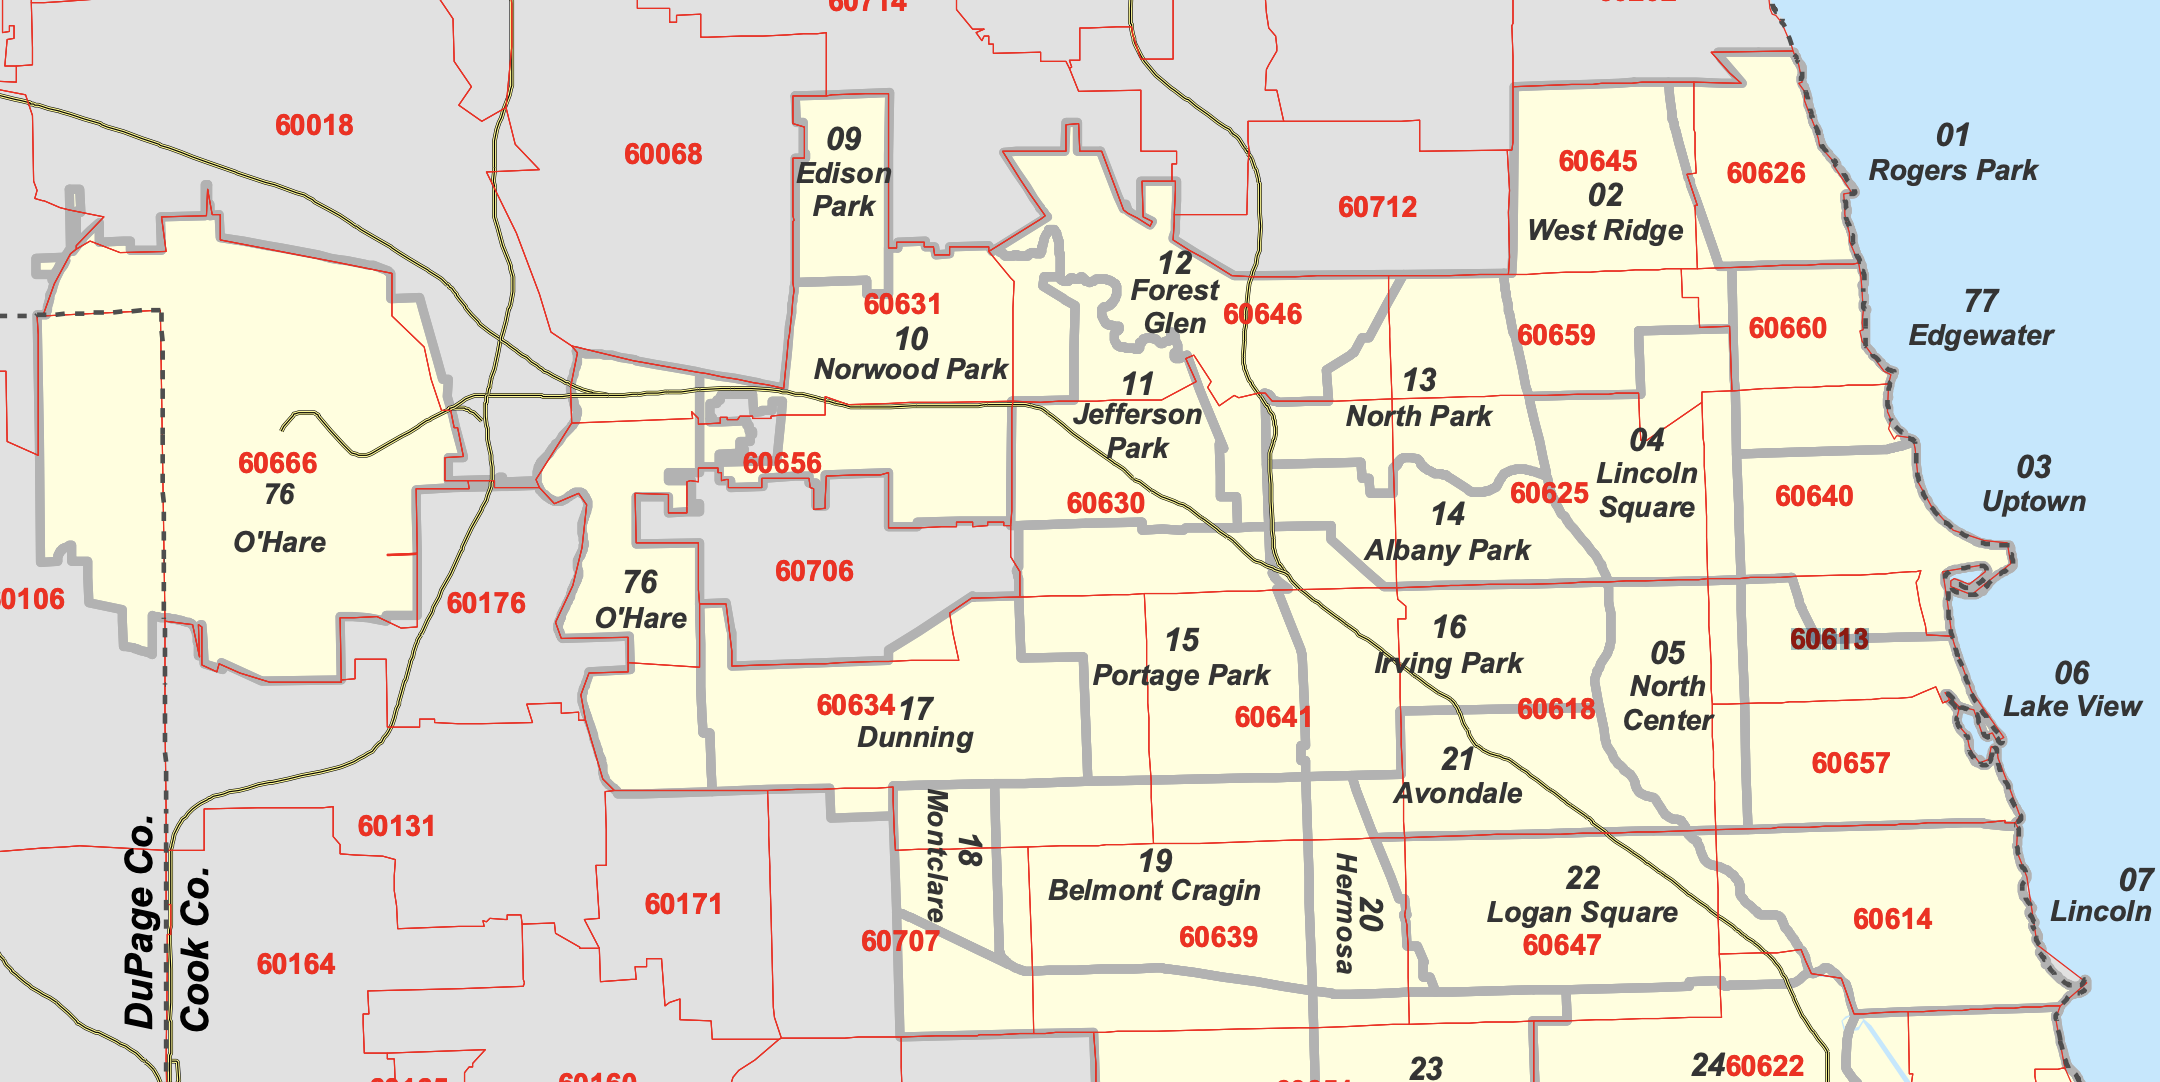

In [12]:
#Result 
#60666 60656 60631 60646 60630 60659 60625 60645 60626 60660 60640 60634 60641 60618 60613 60657 60614 60647 60639 60707
#13.0, 1.0,  1.0,  13.0, 1.0,  0.0,  40.0, 0.0,  3.0,  3.0,  39.0, 0.0,  1.0,  40.0, 40.0, 40.0, 40.0, 40.0, 3.0,  1.0

In [12]:
chargers = [13;1;1;13;1;0;5;0;3;3;3;0;1;3;5;10;5;0;3;1;0;1;7; 31;0;0;6;26;12;15;7;16; 2;4;3; 11;0;0;5 ;4;0;0;1;5;0; 1;2;0;5;1;0;0;0;0;0;0;0;0;4]

59-element Vector{Int64}:
 13
  1
  1
 13
  1
  0
  5
  0
  3
  3
  3
  0
  1
  ⋮
  0
  5
  1
  0
  0
  0
  0
  0
  0
  0
  0
  4

$$ min_x  \sum_{i=1}^{n} cost_j*x_j $$

$$   s.t.          \sum_{i=1}^{n} Probability_{i,j}b_j  \le px_i $$

$$ s.t. \sum_{i=1}^m A_ijx_i \ge 1 $$

In [13]:
using JuMP, GLPK, LinearAlgebra

m, n = size(A)
p = 71 # car/charger; we can change it to 16 and test, it will be more chargers in total
max_chargers = 120

newModel = Model(with_optimizer(GLPK.Optimizer))
@variable(newModel, max_chargers >= x[i=1:n] >= chargers[i])
for i=1:m
    @constraint(newModel, sum(A[i,j]*x[j] for j=1:n) >= 1)
    @constraint(newModel, sum(Prob[i,j]*b[j] for j=1:n) <= p*x[i])
end
@objective(newModel, Min, sum(cost[j]*x[j] for j=1:n))

println("The optimization problem to be solved is:")
print(newModel)
println(" ")
println("The rank of the matrix A: ", rank(A))
println("The number of linear restrictions: ", m)
println("The number of variables: ",n)
println("Number of basic solutions n!/m!(n-m)!: ",factorial(n)/(factorial(m)*factorial(n-m)))

The optimization problem to be solved is:


 
The rank of the matrix A: 57
The number of linear restrictions: 59
The number of variables: 59


LoadError: OverflowError: 59 is too large to look up in the table; consider using `factorial(big(59))` instead

In [14]:
@time begin
    status = optimize!(newModel)
end
println("Objective value: ", JuMP.objective_value(newModel))
println("Optimal solution is x = \n", round.(JuMP.value.(x), digits=0))

  3.500278 seconds (9.78 M allocations: 518.900 MiB, 3.84% gc time, 99.72% compilation time: 3% of which was recompilation)
Objective value: 9.537635108831095e6
Optimal solution is x = 
[13.0, 8.0, 16.0, 13.0, 25.0, 14.0, 32.0, 9.0, 13.0, 18.0, 28.0, 21.0, 27.0, 28.0, 23.0, 31.0, 33.0, 37.0, 9.0, 10.0, 11.0, 24.0, 10.0, 31.0, 8.0, 13.0, 10.0, 26.0, 12.0, 15.0, 10.0, 16.0, 9.0, 9.0, 10.0, 32.0, 11.0, 28.0, 37.0, 36.0, 142.0, 25.0, 20.0, 15.0, 14.0, 9.0, 10.0, 6.0, 15.0, 15.0, 8.0, 11.0, 9.0, 10.0, 18.0, 77.0, 15.0, 6.0, 10.0]


In [15]:
x_vector = round.(JuMP.value.(x), digits=0)
sum(x_vector)

1201.0